# Boosting task

Make a copy of this colab file and follow the instructions to complete the task. You are expected to complete the entire task and it would be appreciated if you did more than what is aksed from you.


ALL THE BEST!

Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import xgboost as xgb


colour = sns.color_palette()

Reading and converting data into a date-time format

In [3]:
df = pd.read_csv('AEP_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


In [7]:
df_new = df.drop_duplicates()

Plot the data:

<Axes: xlabel='Datetime', ylabel='AEP_MW'>

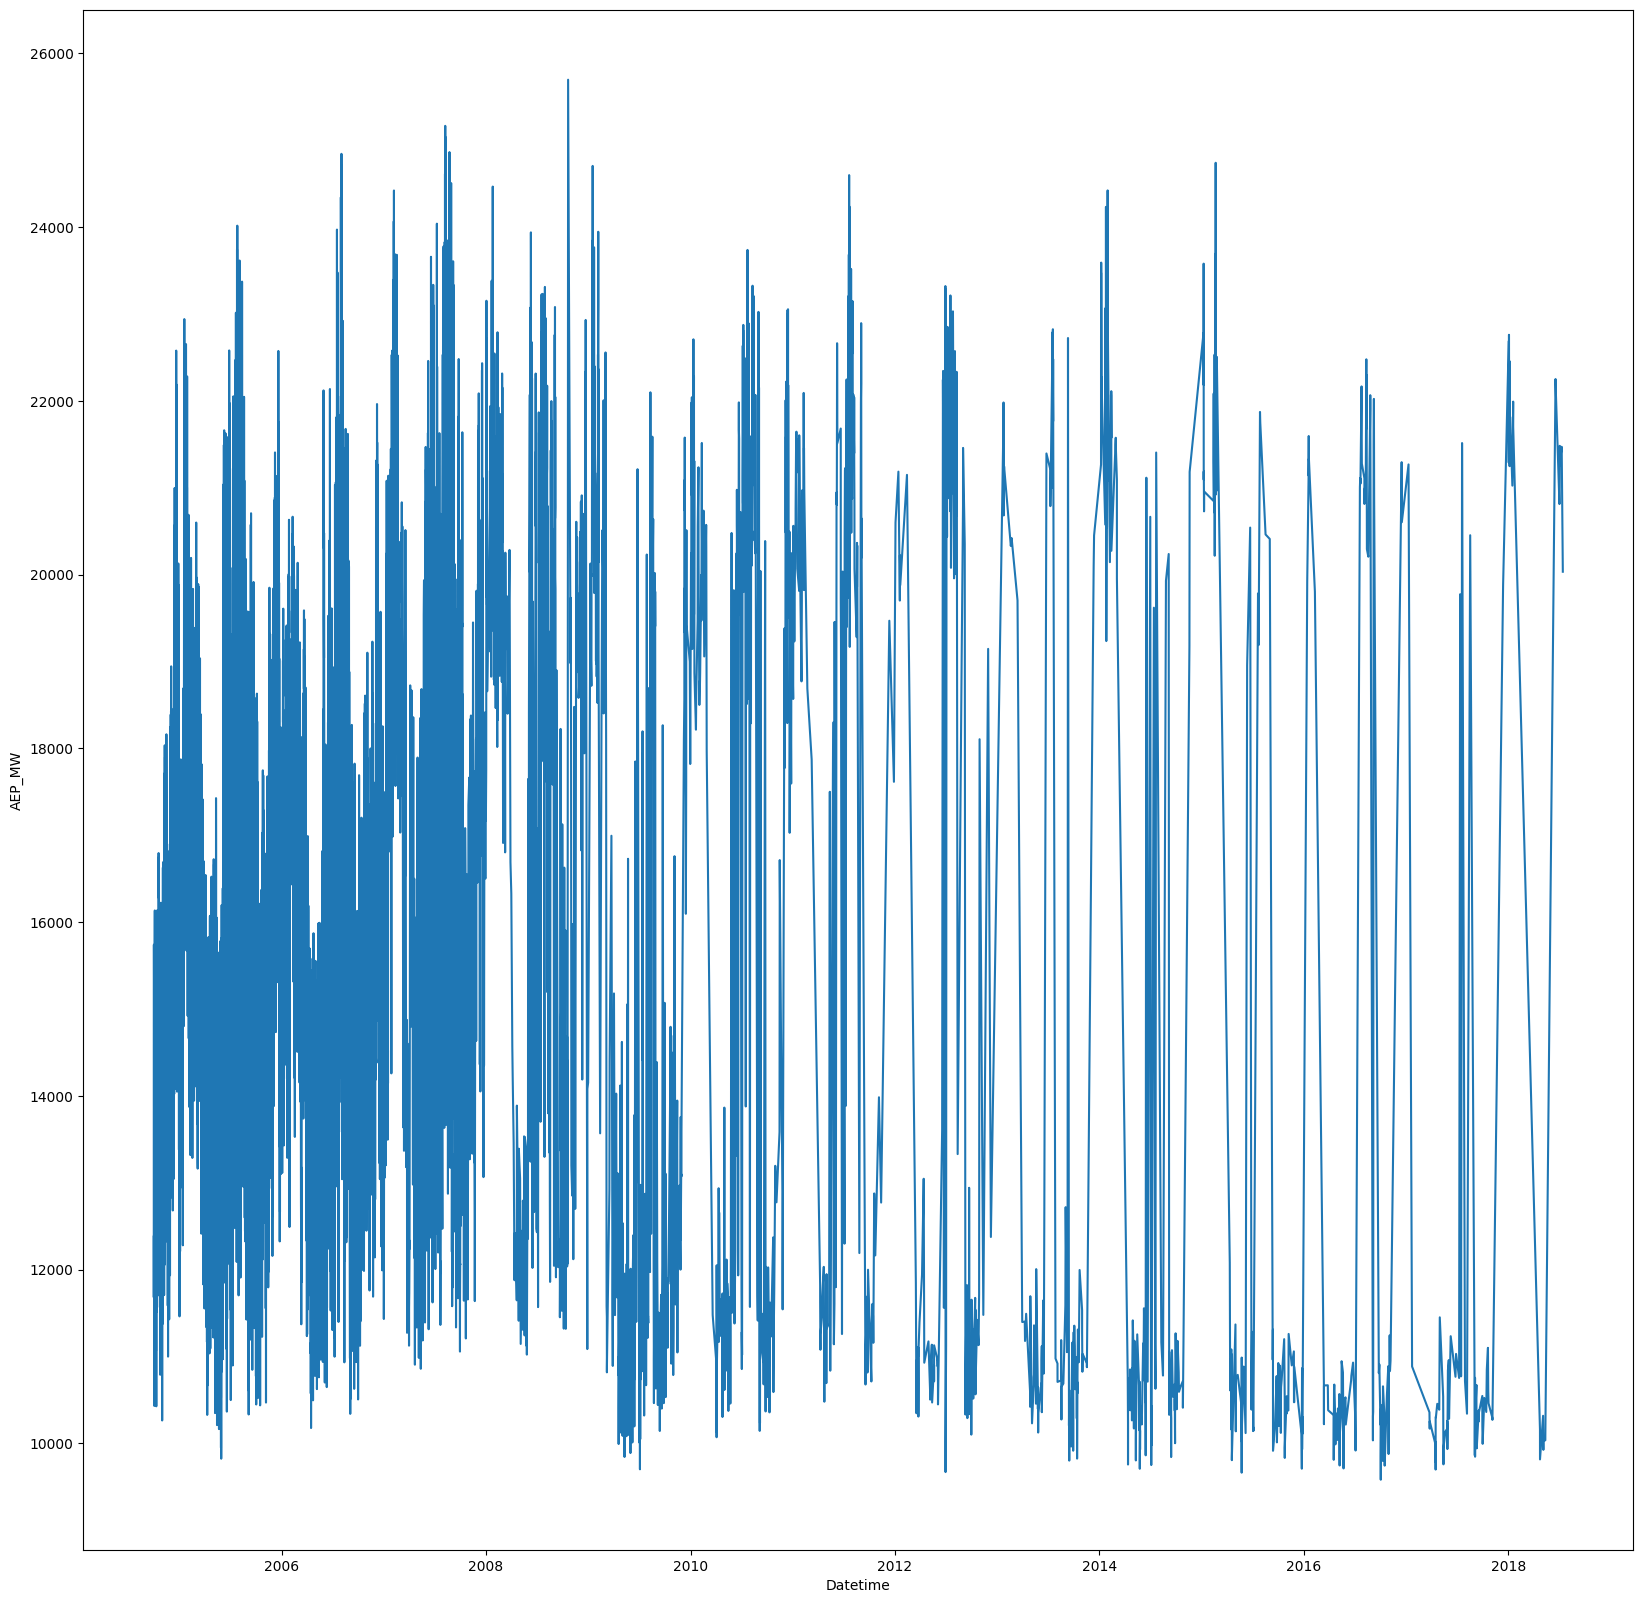

In [8]:
plt.figure(figsize=(20,20))
sns.lineplot(x=df_new.index,y='AEP_MW',data=df_new)

## Data splitting

Split the data into training and testing data, split data at 01-01-2016

In [11]:
df_new.index = pd.to_datetime(df_new.index)

split_date = '2016-01-01'
train_data = df_new[df_new.index < split_date]
test_data = df_new[df_new.index >= split_date]

print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)

Training Data Shape: (12391, 1)
Testing Data Shape: (252, 1)


plot the train and test data

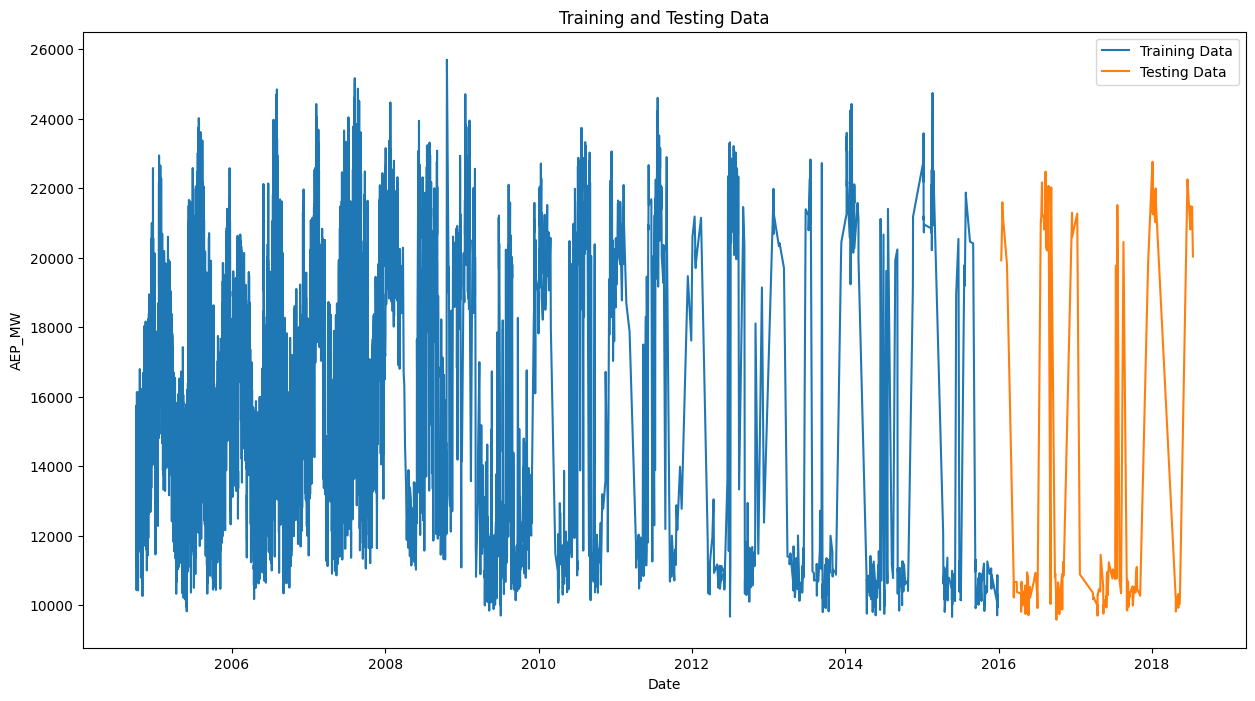

In [12]:
plt.figure(figsize=(15, 8))
sns.lineplot(x=train_data.index, y='AEP_MW', data=train_data, label='Training Data')
sns.lineplot(x=test_data.index, y='AEP_MW', data=test_data, label='Testing Data')
plt.title('Training and Testing Data')
plt.xlabel('Date')
plt.ylabel('AEP_MW')
plt.legend()
plt.show()


Plot data for a random week AND day, to visualize weekly and daily variations in data

<Axes: title={'center': 'Sample Data'}, xlabel='Datetime'>

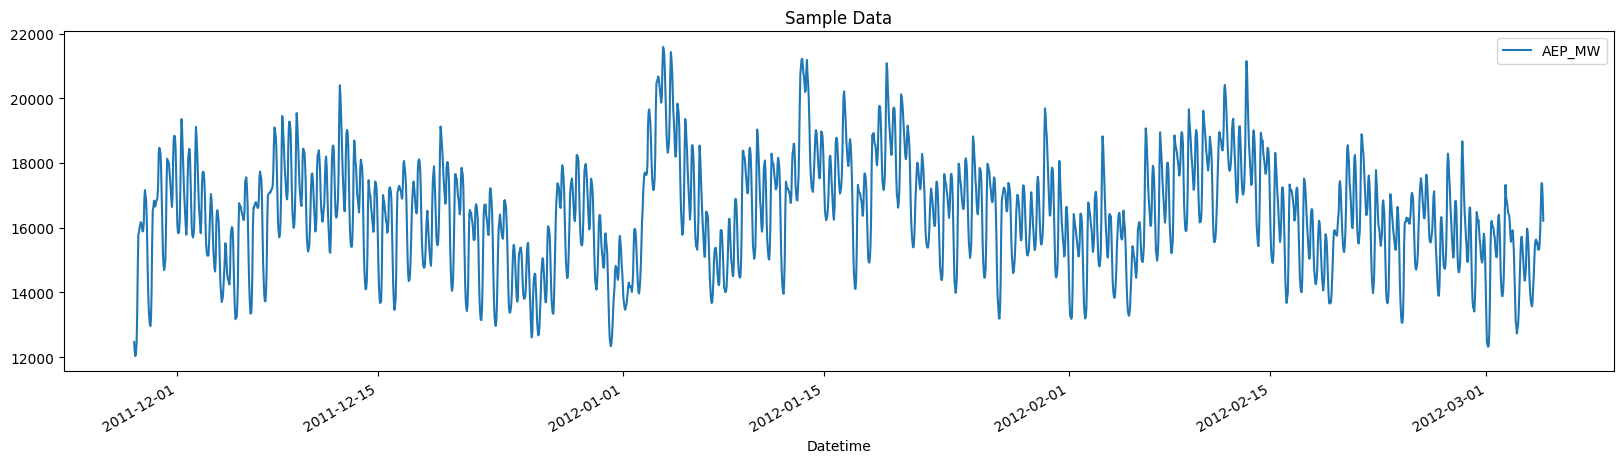

In [15]:
df.loc[("2011-11-28" < df.index) & (df.index < "2012-03-05")].plot(figsize=(20, 5), title="Sample Data")

<Axes: title={'center': 'Sample Data'}, xlabel='Datetime'>

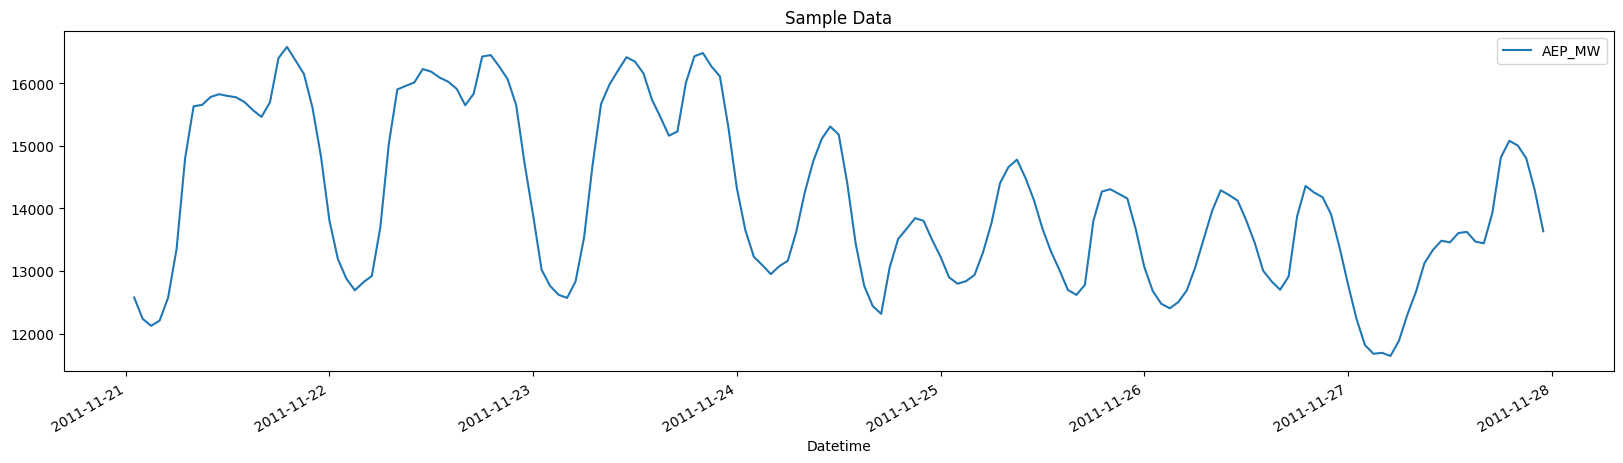

In [16]:
df.loc[("2011-11-21" < df.index) & (df.index < "2011-11-28")].plot(figsize=(20, 5), title="Sample Data")

## Feature Creation


Create different features for: hour, day, month, year, week and append it to the data-frame

In [17]:
df['Hour'] = df.index.hour
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Year'] = df.index.year
df['Week'] = df.index.isocalendar().week

In [18]:
print(df.head())

                      AEP_MW  Hour  Day  Month  Year  Week
Datetime                                                  
2004-12-31 01:00:00  13478.0     1   31     12  2004    53
2004-12-31 02:00:00  12865.0     2   31     12  2004    53
2004-12-31 03:00:00  12577.0     3   31     12  2004    53
2004-12-31 04:00:00  12517.0     4   31     12  2004    53
2004-12-31 05:00:00  12670.0     5   31     12  2004    53


Make boxplots to depict energy consumption hourly and monthly.(x variable would be hour and month and y variable would be the feature 'AEP_MW'

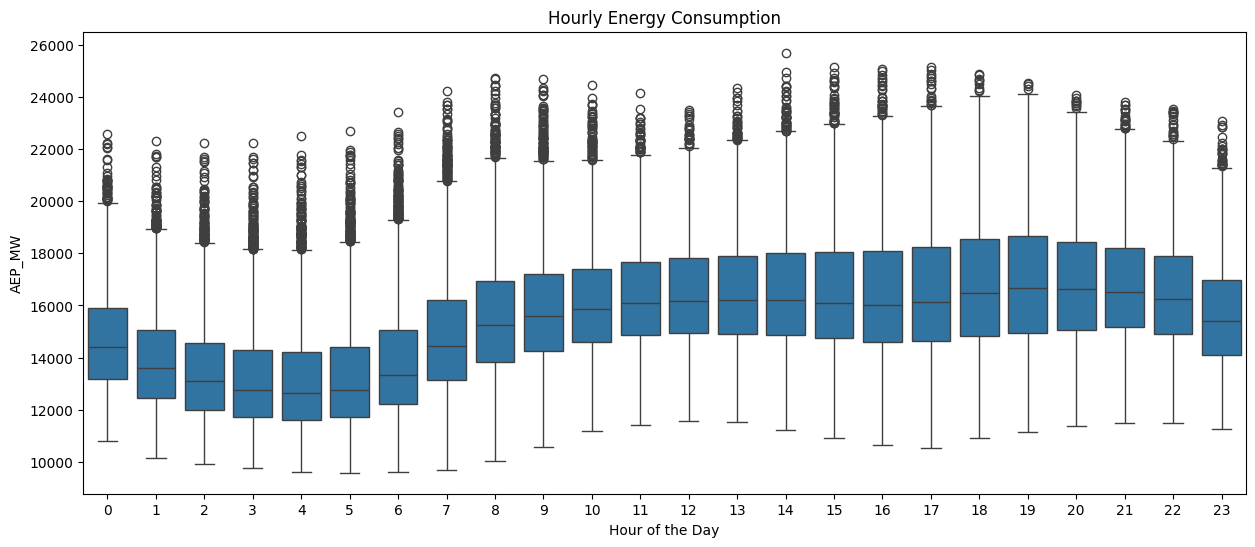

In [19]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Hour', y='AEP_MW', data=df)
plt.title('Hourly Energy Consumption')
plt.xlabel('Hour of the Day')
plt.ylabel('AEP_MW')
plt.show()

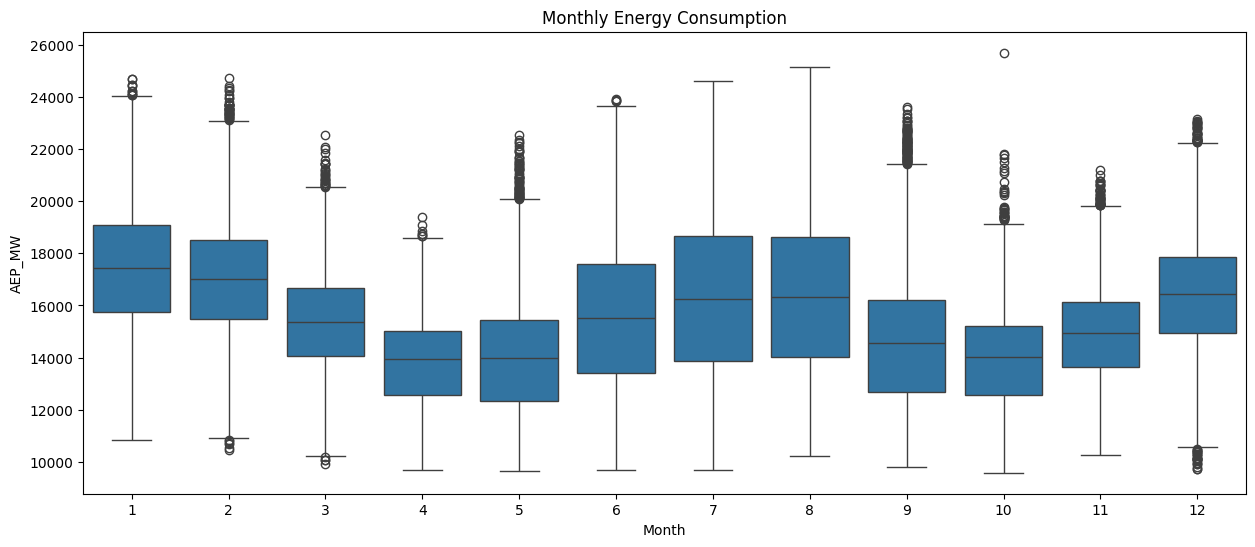

In [20]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Month', y='AEP_MW', data=df)
plt.title('Monthly Energy Consumption')
plt.xlabel('Month')
plt.ylabel('AEP_MW')
plt.show()

## Model Creation andEestimation

Run a regression XGBoost model on the training and testing data-set. Take 1000 estimators and learnning rate as 0.01

In [21]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X = df[['Hour', 'Day', 'Month', 'Year', 'Week']]
y = df['AEP_MW']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xg_reg = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.01)

xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Predict values for the testing set using the model and plot them

In [22]:
y_pred = xg_reg.predict(X_test)

Use RMSE to find out the accuracy of your model

In [24]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ",rmse)

RMSE:  1266.809281027102


In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7607228921353899

Find the importance of each feature use

In [30]:
df.corr()

,AEP_MW,Hour,Day,Month,Year,Week
AEP_MW,1.000000,0.419480,-0.006847,-0.125545,-0.175130,-0.124507
Hour,0.419480,1.000000,-0.000108,-0.000012,-0.000165,-0.000029
Day,-0.006847,-0.000108,1.000000,0.010507,-0.001892,0.067819
Month,-0.125545,-0.000012,0.010507,1.000000,-0.093532,0.971491
Year,-0.175130,-0.000165,-0.001892,-0.093532,1.000000,-0.092526
Week,-0.124507,-0.000029,0.067819,0.971491,-0.092526,1.000000


  Feature  Importance
0    Hour    0.460836
2   Month    0.243565
4    Week    0.179107
3    Year    0.084512
1     Day    0.031980


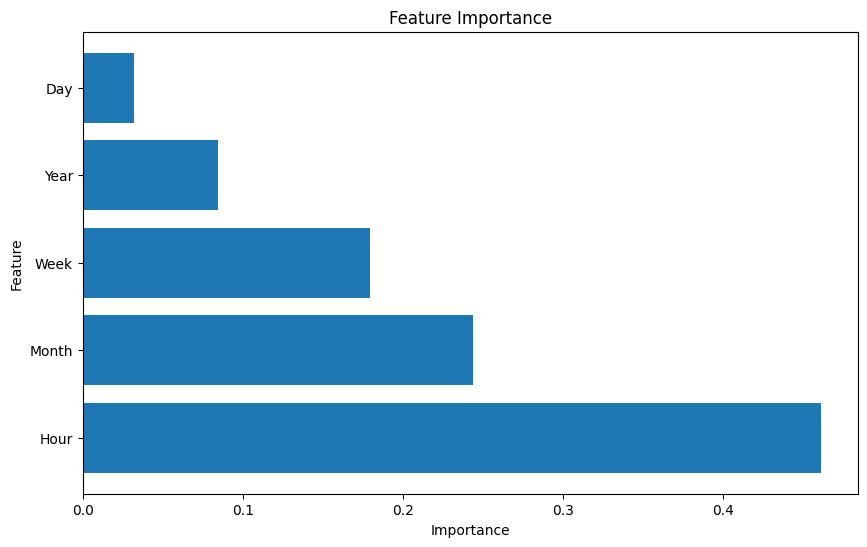

In [27]:
feature_importance = xg_reg.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()